<a href="https://colab.research.google.com/github/leeno-ob/IT326-project/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Phase 2 – Data Analysis
## Statistical Summary and Outlier Detection

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

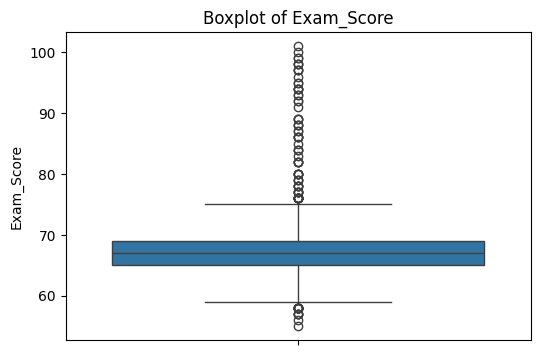

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load raw dataset
url = "https://raw.githubusercontent.com/leeno-ob/IT326-project/refs/heads/main/Dataset/Raw_dataset.csv"
df = pd.read_csv(url)


print(df.head())

print("Statistical Summary (df.describe()):")
print(df.describe())

col_name = "Exam_Score"
col = df[col_name]

minimum = col.min()
maximum = col.max()
median  = col.median()

# Quartiles
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)

print("\nFive-Number Summary for", col_name)
print("Min   =", minimum)
print("Q1    =", Q1)
print("Median=", median)
print("Q3    =", Q3)
print("Max   =", maximum)

# IQR
IQR = Q3 - Q1
print("\nIQR =", IQR)

# Outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound =", lower_bound)
print("Upper Bound =", upper_bound)

outliers = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]
print("\nNumber of Outliers =", len(outliers))

outliers[[col_name]].head()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(y=df[col_name])
plt.title("Boxplot of " + col_name)
plt.ylabel(col_name)
plt.show()



#Exam_Score

From the results, we can see that most exam scores are between 65 and 69, since the median is 67.
The IQR is 4, which means the data is not very spread out in the middle range.
However, there are many outliers (104 values), which appear clearly in the boxplot above 75 and below 59.
This means some students scored much higher or lower than the majority.


Five-Number Summary for Hours_Studied
Min   = 1
Q1    = 16.0
Median= 20.0
Q3    = 24.0
Max   = 44

IQR = 8.0
Lower Bound = 4.0
Upper Bound = 36.0
Number of Outliers = 43


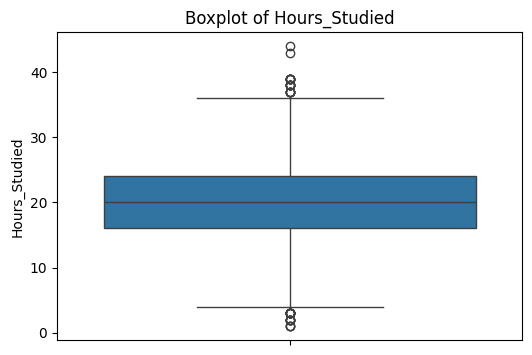

In [12]:
# -----------------------------------------
# Analysis for Second Numeric Attribute
# -----------------------------------------

col_name = "Hours_Studied"
col = df[col_name]

minimum = col.min()
maximum = col.max()
median  = col.median()

Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)

print("\nFive-Number Summary for", col_name)
print("Min   =", minimum)
print("Q1    =", Q1)
print("Median=", median)
print("Q3    =", Q3)
print("Max   =", maximum)

# IQR
IQR = Q3 - Q1
print("\nIQR =", IQR)

# Outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound =", lower_bound)
print("Upper Bound =", upper_bound)

outliers = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]
print("Number of Outliers =", len(outliers))

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(y=df[col_name])
plt.title("Boxplot of " + col_name)
plt.ylabel(col_name)
plt.show()

Hours_Studied

The median number of study hours is 20 hours.
Most students studied between 16 and 24 hours (Q1 to Q3).
The IQR is 8, so the spread is a bit larger compared to Exam_Score.
There are 43 outliers, which means some students studied much less or much more than the typical range.

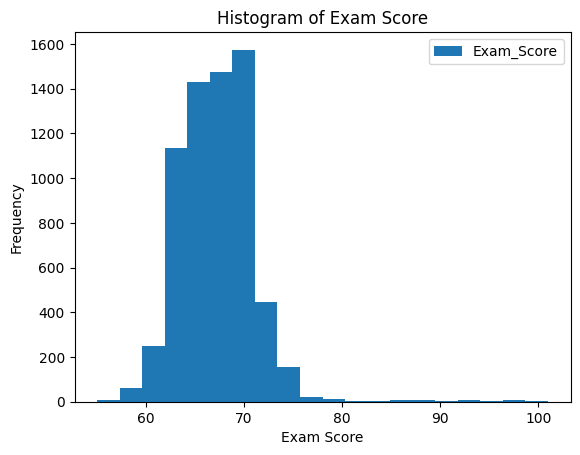

In [13]:
df.plot.hist(column='Exam_Score', bins=20)
plt.title("Histogram of Exam Score")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()


This histogram shows the distribution of exam scores.
It helps in understanding how the scores are spread across the dataset and whether the distribution is skewed.
This information is useful to determine if preprocessing techniques such as normalization or discretization are needed.

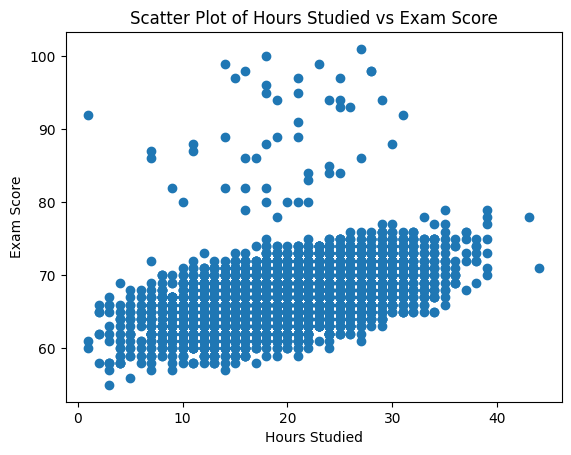

In [14]:
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Scatter Plot of Hours Studied vs Exam Score")
plt.show()

This scatter plot shows the relationship between hours studied and exam score.
It helps in identifying whether there is a correlation between the two variables.
Understanding this relationship is useful in determining which attributes may be important for further analysis.

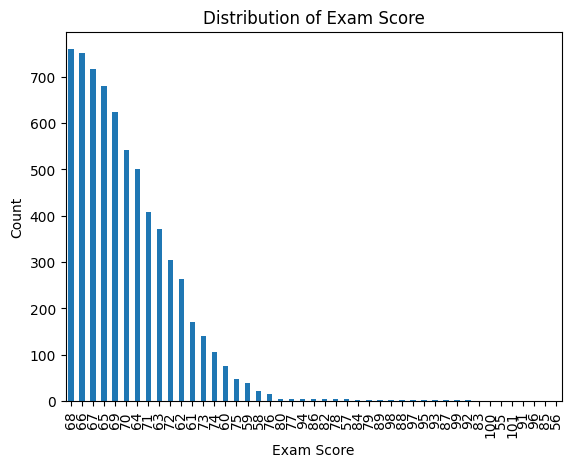

In [15]:
df['Exam_Score'].value_counts().plot(kind='bar')
plt.title("Distribution of Exam Score")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()

This bar plot shows how frequently each exam score appears in the dataset.
The distribution is not evenly balanced, which may affect modeling and may require preprocessing.

## Missing Values

In [16]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Some columns contain missing values which are Teacher_Quality, Parental_Education_Level, and Distance_from_Home, those missing values should be handled using appropriate preprocessing techniques before modeling.


## Class Distribution

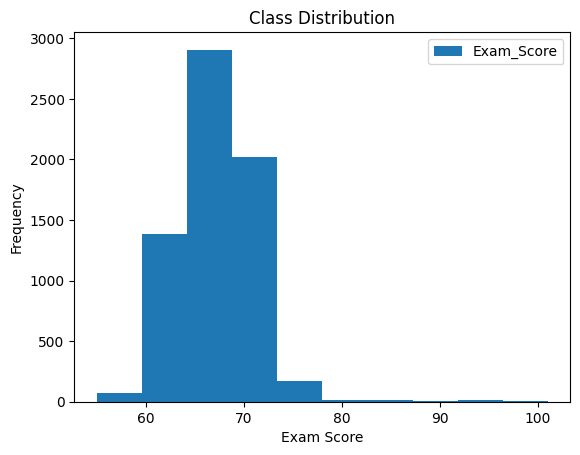

In [24]:
df.plot.hist(column='Exam_Score', bins=10)
plt.title("Class Distribution")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

The histogram shows that most students scored in the middle range, while high scores are less common. This uneven distribution may impact the model and suggests that preprocessing techniques might be needed.